In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

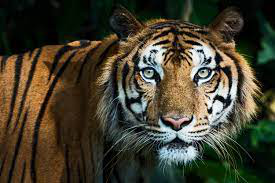

In [2]:
imgData = image.load_img('image1/tiger/1.jpg')
imgData

In [3]:
type(imgData)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
dataGen = image.ImageDataGenerator(rescale=1./255)

In [5]:
trainGen = dataGen.flow_from_directory( 'image1', target_size=(98, 98) )

Found 20 images belonging to 2 classes.


In [6]:
type(trainGen)

keras.preprocessing.image.DirectoryIterator

In [7]:
x_train, y_train = trainGen.next()

In [8]:
x_train.shape
#개수, 가로 세로 길이, color depth

(20, 98, 98, 3)

In [9]:
y_train.shape

(20, 2)

In [10]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

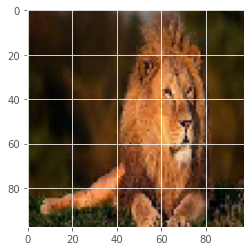

In [11]:
plt.imshow(x_train[0])
plt.show()

In [12]:
x_train[0]

array([[[0.20000002, 0.1254902 , 0.07058824],
        [0.20000002, 0.1254902 , 0.07058824],
        [0.20000002, 0.1254902 , 0.07058824],
        ...,
        [0.08627451, 0.09019608, 0.03529412],
        [0.15294118, 0.10196079, 0.03921569],
        [0.23137257, 0.14117648, 0.07058824]],

       [[0.20000002, 0.1254902 , 0.07058824],
        [0.20000002, 0.1254902 , 0.07058824],
        [0.20000002, 0.1254902 , 0.07058824],
        ...,
        [0.07843138, 0.07843138, 0.03137255],
        [0.14901961, 0.09411766, 0.04313726],
        [0.21568629, 0.13333334, 0.06666667]],

       [[0.20000002, 0.1254902 , 0.07058824],
        [0.20000002, 0.1254902 , 0.07058824],
        [0.20000002, 0.1254902 , 0.07058824],
        ...,
        [0.07843138, 0.06666667, 0.03137255],
        [0.14117648, 0.08627451, 0.0509804 ],
        [0.19607845, 0.10980393, 0.05882353]],

       ...,

       [[0.06666667, 0.08235294, 0.        ],
        [0.0627451 , 0.07843138, 0.        ],
        [0.16862746, 0

In [13]:
y_train[0]

array([1., 0.], dtype=float32)

In [14]:
trainGen.class_indices

{'lion': 0, 'tiger': 1}

In [16]:
model = Sequential()
model.add( Flatten( input_shape=(98, 98, 3) ) )
model.add( Dense( units=64, activation='relu' ) ) #vanishing gradient 방지
model.add( Dense( units=32, activation='relu' ) )
model.add( Dense( units=2, activation='softmax' ) )
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc']) #원핫 안해도 됨
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 247ms/step - loss: 0.8187 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 7.9490 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 2.6616 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6246 - acc: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3704 - acc: 0.8500
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 0.4863 - acc: 0.6500
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6541 - acc: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2214 - acc: 0.9500
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.3900 - acc: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1700 - acc: 0.9500
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 0.2837 - acc: 0

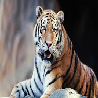

In [17]:
testImg = image.load_img('image1/test.jpg', target_size=(98, 98))
testImg

In [19]:
type(testImg)

PIL.Image.Image

In [20]:
imgArr = image.img_to_array(testImg)/255
imgArr

array([[[0.5372549 , 0.5529412 , 0.5568628 ],
        [0.62352943, 0.62352943, 0.62352943],
        [0.6666667 , 0.63529414, 0.627451  ],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.03529412, 0.03529412, 0.03529412]],

       [[0.5647059 , 0.5686275 , 0.5764706 ],
        [0.63529414, 0.627451  , 0.6313726 ],
        [0.67058825, 0.6392157 , 0.6313726 ],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.03529412, 0.03529412, 0.03529412]],

       [[0.59607846, 0.59607846, 0.5882353 ],
        [0.65882355, 0.6431373 , 0.6392157 ],
        [0.6784314 , 0.6392157 , 0.63529414],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.03529412, 0.03529412, 0.03529412]],

       ...,

       [[0.78039217, 0.7294118 , 0.654902  ],
        [0.7607843 , 0.70980394, 0.6431373 ],
        [0.74509805, 0

In [21]:
imgArr.shape

(98, 98, 3)

In [22]:
model.predict(imgArr.reshape(1, 98, 98, 3)).argmax(axis=1)

array([1], dtype=int64)